In [7]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Models
from sklearn import linear_model
from scipy import stats

In [4]:
df = pd.read_csv('data/data.csv')

Intercept: -1657374.4705277525
Coefficients:
  Lot Frontage: 43.6007
  Lot Area: 0.5392
  Year Built: 842.4558
  1st Flr SF: 84.8363
  2nd Flr SF: 80.8559
  BsmtFin SF 1: 54.6727
  BsmtFin SF 2: 36.3268
  Bsmt Unf SF: 33.8625
R^2: 0.7273


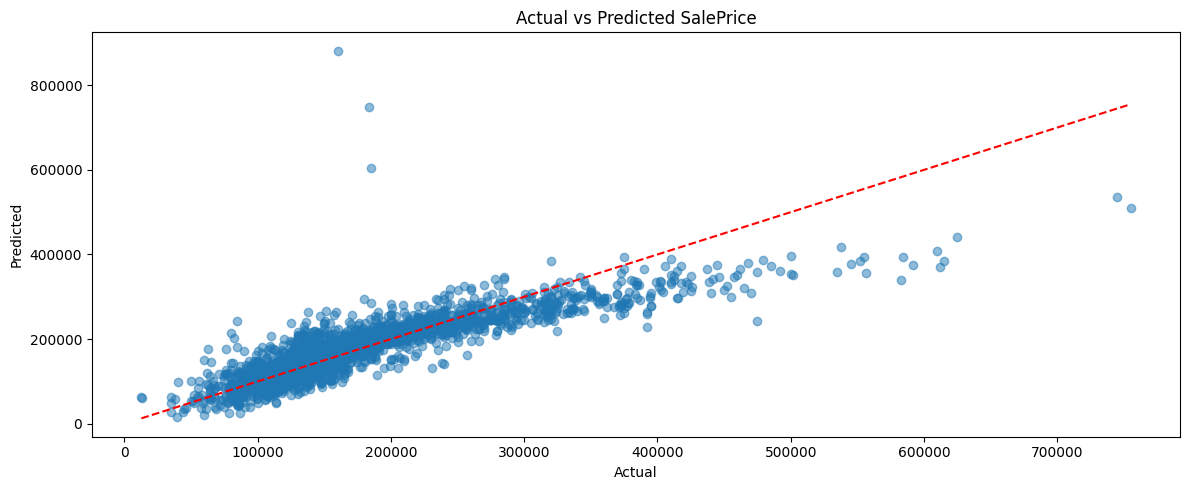

In [18]:
# Estimate linear regression model of SalePrice on selected factors

features = [
    "Lot Frontage",
    "Lot Area",
    "Year Built",
    "1st Flr SF",
    "2nd Flr SF",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Bsmt Unf SF",
]

data = df[features + ["SalePrice"]].dropna()
X = data[features]
y = data["SalePrice"]

model = linear_model.LinearRegression()
model.fit(X, y)

# Predictions and quick metrics
y_pred = model.predict(X)
r2 = model.score(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"R^2: {r2:.4f}")

coef = pd.Series(model.coef_, index=features).sort_values()
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.title("Actual vs Predicted SalePrice")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

# Lot.Frontage, Lot.Area, Year.Built, X1st.F lr.SF , X2nd.F lr.SF , Gr.Liv.Area, BsmtFin.SF.1, BsmtFin.SF.2, Bsmt.Unf.SF?
# No, we cannot do linear model in here - Gr.Liv.Area is a sum of 1st and 2nd floor area, so it is highly correlated with them. We can drop it and do linear regression without it.

In [21]:
#Test the statistical significance of the variable Lot.F rontage. Write down the corresponding hypotheses and the
# test statistics which should be used. Explain how the test works. Write down the critical region for significance
# level 5%. Run the test and formulate the conclusion

# Hypotheses:
# H0: The coefficient of Lot Frontage is equal to zero (no effect on SalePrice)
# H1: The coefficient of Lot Frontage is not equal to zero (has an effect on SalePrice)

import statsmodels.api as sm

features = ["Lot Frontage", "Lot Area", "Year Built", "1st Flr SF", 
            "2nd Flr SF", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF"]

# 2. Statsmodels needs an explicit intercept (constant) added to X
X_with_const = sm.add_constant(df[features].dropna())
y = df.loc[X_with_const.index, "SalePrice"]

# 3. Fit the Ordinary Least Squares (OLS) model
model_stats = sm.OLS(y, X_with_const).fit()
r2 = model_stats.rsquared
print(f"R^2: {r2:.4f}")
r2_adj = model_stats.rsquared_adj
print(f"Adjusted R^2: {r2_adj:.4f}")

# 4. Extract the specific T-statistic and P-value for Lot Frontage
# The test calculates how many standard errors the estimated coefficient is away from zero.
t_stat = model_stats.tvalues["Lot Frontage"]
p_val = model_stats.pvalues["Lot Frontage"]

print(f"T-statistic for Lot Frontage: {t_stat:.4f}")
print(f"P-value for Lot Frontage: {p_val:.4e}")


R^2: 0.7273
Adjusted R^2: 0.7264
T-statistic for Lot Frontage: 0.9383
P-value for Lot Frontage: 3.4817e-01


In [31]:
#Test the statistical significance of the variable Lot.F rontage. Write down the corresponding hypotheses and the
# test statistics which should be used. Explain how the test works. Write down the critical region for significance
# level 5%. Run the test and formulate the conclusion

# Hypotheses:
# H0: The coefficient of Lot Frontage is equal to zero (no effect on SalePrice)
# H1: The coefficient of Lot Frontage is not equal to zero (has an effect on SalePrice)

import statsmodels.api as sm

features = ["Lot Area", "Year Built", "1st Flr SF", 
            "2nd Flr SF", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF"]

# 2. Statsmodels needs an explicit intercept (constant) added to X
X_with_const = sm.add_constant(df[features].dropna())
y = df.loc[X_with_const.index, "SalePrice"]

# 3. Fit the Ordinary Least Squares (OLS) model
model_stats = sm.OLS(y, X_with_const).fit()
r2 = model_stats.rsquared
print(f"R^2: {r2:.4f}")
r2_adj = model_stats.rsquared_adj
print(f"Adjusted R^2: {r2_adj:.4f}")

# Analyse change in R^2 and Adjusted R^2 after dropping Lot Frontage
# 0.7273 -> 0.7258 
# 0.7264 -> 0.7251 
# The change is very small, which suggests that Lot Frontage does not contribute much to the model. This is consistent with the previous test where we found that the coefficient of Lot Frontage was not statistically significant.


R^2: 0.7275
Adjusted R^2: 0.7265


In [32]:
# Interpret the value of the intercept in the estimated model.
print(f"Intercept: {model_stats.params['const']:.4f}")

# The intercept is negative has no practical meaning in this context, as it represents the predicted SalePrice when all independent variables are zero, which is not a realistic scenario for a house. 
# Also, there is YearBuilt factor - it is not possible to have a house built in year 0, so the intercept cannot be interpreted as the price of a house with all features equal to zero.

Intercept: -1671531.4931


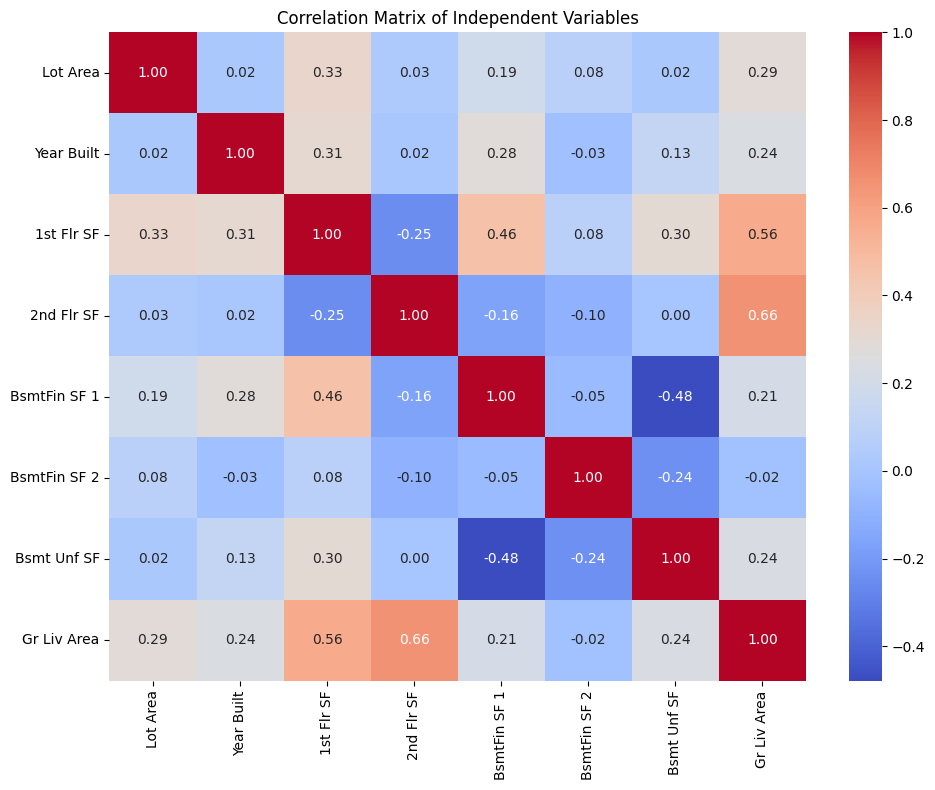

In [38]:
features = ["Lot Area", "Year Built", "1st Flr SF", 
            "2nd Flr SF", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Gr Liv Area"]

# Analyse the model for multicollinearity. Which diagnostic measures would you use?

# We can use correlation matrix to find highly correlated independent vars 
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Independent Variables")
plt.tight_layout()

Text(0, 0.5, 'Frequency')

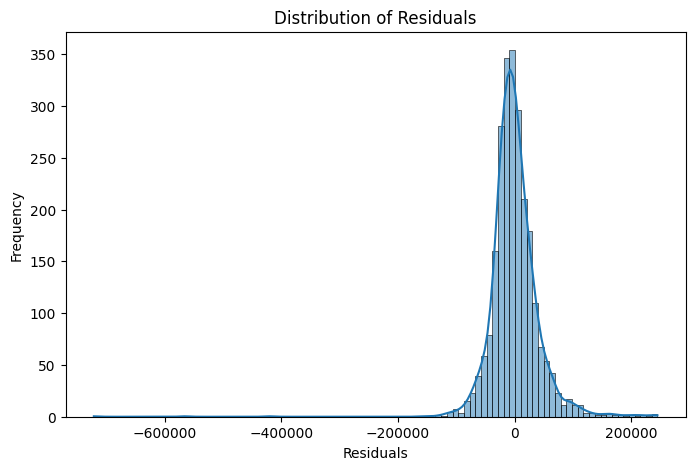

In [39]:
# Test residuals for normality

# We can plot histogram and we expect to see bell-shaped distrubtion if residuals are normally distributed 
plt.figure(figsize=(8, 5))
sns.histplot(model_stats.resid, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Looks good to me

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch–Pagan test for heteroskedasticity
# H0: homoskedasticity (constant error variance)
# H1: heteroskedasticity (error variance depends on regressors)
# The test regresses squared residuals on the model regressors and uses LM/F statistics.


bp_lm, bp_lm_pvalue, bp_f, bp_f_pvalue = het_breuschpagan(
    model_stats.resid,      # residuals from fitted OLS model
    model_stats.model.exog  # design matrix used in that model
)

# How test works?
# - Calculate residuals from the OLS model.
# - Regress the squared residuals on the original regressors (or a subset).
# - Compute the LM statistic: n * R^2 from this auxiliary regression.
# - Compute the F statistic: (R^2 / k) / ((1 - R^2) / (n - k - 1)), where k is the number of regressors and n is the sample size.
# - Compare the LM statistic to a chi-squared distribution with k degrees of freedom, and the F statistic to an F distribution with (k, n-k-1) degrees of freedom.

print("Breusch–Pagan test results:")
print(f"LM statistic: {bp_lm:.4f}")
print(f"LM p-value:   {bp_lm_pvalue:.4e}")
print(f"F statistic:  {bp_f:.4f}")
print(f"F p-value:    {bp_f_pvalue:.4e}")


Breusch–Pagan test results:
LM statistic: 603.3490
LM p-value:   4.0014e-124
F statistic:  88.7081
F p-value:    5.2177e-143
